![Alt text: Logo da Zoop](https://github.com/alura-cursos/python-analise-chatgpt-assistente/blob/main/Logos%20e%20paleta%20-%20ZOOP/Logo%20fundo%20colorido%20(2).png?raw=true)

# Aula 1 - Acesso aos dados

In [47]:
url = 'https://github.com/alura-cursos/python-analise-chatgpt-assistente/raw/main/Dados/dados_vendas.json'

### Prompt:

Vamos atuar como cientistas de dados em uma empresa de supermercados.

Recebemos dados no formato de arquivo JSON, estruturados em listas e dicionários. O arquivo está disponibilizado em uma URL do Github.

Precisamos analisar esses dados para ajudar nas decisões da empresa. Programamos em Python e conhecemos as bibliotecas de análise de dados Numpy e Pandas. Portanto, priorize o uso dessas bibliotecas.

Por favor, nos informe como podemos fazer a leitura desses dados no formato JSON e como podemos visualizá-los em formato de tabela no Python.

In [48]:
import numpy as np
import pandas as pd


In [49]:
df = pd.read_json(url)
df.head()

,item_identificador,loja_identificador,vendas_totais,item,loja
0,FDB08,OUT018,176503.58,"{'item_peso': 6.055, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
1,DRQ35,OUT049,185758.20,"{'item_peso': 9.3, 'item_conteudo_gordura': 'B...","{'loja_ano_estabelecimento': 2009, 'loja_taman..."
2,FDD14,OUT018,165983.94,"{'item_peso': 20.7, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
3,FDY37,OUT045,314923.40,"{'item_peso': 17.0, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2012, 'loja_taman..."
4,FDY59,OUT018,64782.34,"{'item_peso': 8.195, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."


### Prompt:

O DataFrame "df" possui as colunas "item_identificador", "loja_identificador", "vendas_totais", "item" e "loja".

As colunas "item" e "loja" contêm dicionários aninhados dentro de cada uma das linhas. Como posso transformar os dados dos dicionários e colunas para torná-los mais acessíveis no meu DataFrame?

In [50]:
import pandas as pd
from pandas import json_normalize

# Supondo que 'df' é o DataFrame que você já carregou

# Normalizar a coluna 'item' e expandir em colunas separadas
df_item = json_normalize(df['item'])

# Normalizar a coluna 'loja' e expandir em colunas separadas
df_loja = json_normalize(df['loja'])

# Combinar os DataFrames resultantes de volta ao DataFrame original
df = pd.concat([df, df_item, df_loja], axis=1)

# Remover as colunas originais 'item' e 'loja'
df = df.drop(['item', 'loja'], axis=1)

# Exibir o DataFrame transformado
df.head()


,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


# Aula 2 - Exploração dos dados

### Prompt:

O DataFrame "df" contém dados referentes às vendas de diversos produtos em várias lojas do supermercado. São fornecidos IDs de produtos e IDs de lojas que comercializaram esses produtos, o total arrecadado em vendas, bem como descrições sobre o produto vendido e a loja que o vendeu.

Estamos iniciando a etapa de exploração de dados, na qual desejamos conhecer os valores informados e identificar se existem valores ausentes, duplicados e outras inconsistências.

Por favor, construa um código para executar a etapa de exploração de dados usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [51]:
df.head()

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


In [52]:
df.nunique()

item_identificador          1559
loja_identificador            10
vendas_totais               3493
item_peso                    415
item_conteudo_gordura          5
item_visibilidade           7880
item_tipo                     16
item_preco                  4839
item_quantidade_venda          0
loja_ano_estabelecimento       9
loja_tamanho                   3
loja_tipo_localizacao          3
loja_tipo                      4
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8550 non-null   object 
 1   loja_identificador        8550 non-null   object 
 2   vendas_totais             8550 non-null   float64
 3   item_peso                 7081 non-null   float64
 4   item_conteudo_gordura     8550 non-null   object 
 5   item_visibilidade         8550 non-null   float64
 6   item_tipo                 8550 non-null   object 
 7   item_preco                8550 non-null   float64
 8   item_quantidade_venda     0 non-null      object 
 9   loja_ano_estabelecimento  8550 non-null   int64  
 10  loja_tamanho              6133 non-null   object 
 11  loja_tipo_localizacao     8550 non-null   object 
 12  loja_tipo                 8550 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 868.5+ KB


In [54]:
df.describe()

,vendas_totais,item_peso,item_visibilidade,item_preco,loja_ano_estabelecimento
count,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


In [55]:
duplicados = df.duplicated().sum()
duplicados

27

In [56]:
ausentes = df.isnull().sum()
ausentes.head()

item_identificador          0
loja_identificador          0
vendas_totais               0
item_peso                1469
item_conteudo_gordura       0
dtype: int64

In [57]:
estatisticas_descritivas = df.describe()
estatisticas_descritivas.describe()

,vendas_totais,item_peso,item_visibilidade,item_preco,loja_ano_estabelecimento
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000
mean,2.853251e+05,895.327941,1068.827721,1184.250377,2575.025369
std,4.265474e+05,2499.395555,3022.850087,2977.117961,2513.522851
min,3.329000e+03,4.555000,0.000000,31.290000,8.372541
25%,6.475599e+04,7.738377,0.045440,85.923891,1996.500000
50%,1.751215e+05,12.727511,0.060064,141.971226,2008.415205
75%,2.411702e+05,17.975000,0.153082,206.042500,2015.250000
max,1.308696e+06,7081.000000,8550.000000,8550.000000,8550.000000


### Prompt:

O DataFrame "df" contém dados relacionados às vendas durante um trimestre de um supermercado. Desejo utilizá-lo para verificar o desempenho dessas vendas.

Durante a exploração do "df", identificamos algumas inconsistências, como:

- Linhas duplicadas,
- Valores nulos e
- Dados categóricos que foram escritos de maneira não padronizada, dando a ideia de que existem mais categorias do que as que realmente existem.

O que devo fazer para garantir que essas inconsistências que encontrei não afetem minha análise?

# Aula 3 - Limpeza e tratamento

### Prompt:

Durante a exploração do DataFrame "df", identificamos 27 linhas duplicadas usando "df.duplicated().sum()".

O objetivo é analisar os dados em "df" para medir o desempenho de uma empresa durante um trimestre de vendas.

O que devemos fazer com os dados duplicados para garantir que não haja impacto negativo na análise?

In [58]:
# Remover linhas duplicadas
df = df.drop_duplicates()

# Verificar se as duplicatas foram removidas com sucesso
df.duplicated().sum()

df.head()


,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


### Prompt:

Identificamos três colunas em "df" que apresentam valores nulos:

- A coluna "item_quantidade_venda" possui 8550 linhas com valores nulos.
- A coluna "item_peso" possui 1469 linhas com valores nulos.
- A coluna "loja_tamanho" possui 2417 linhas com valores nulos.

Houve um grande número de vendas de itens durante o trimestre, e não há justificativa para a ausência de dados na coluna "item_quantidade_venda", o que a torna uma coluna dispensável.

A coluna "item_peso" contém valores do tipo float, representando o peso em gramas dos produtos.

A coluna "loja_tamanho" possui três categorias de tamanho para supermercados.

Como devo lidar com esses dados nulos para garantir que minha análise não seja prejudicada?

In [59]:
df.drop(columns=['item_quantidade_venda'], inplace=True)

In [60]:
df['item_peso'].fillna(df['item_peso'].mean(), inplace=True)

In [61]:
df['loja_tamanho'].fillna('Não registrado', inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8523 non-null   object 
 1   loja_identificador        8523 non-null   object 
 2   vendas_totais             8523 non-null   float64
 3   item_peso                 8523 non-null   float64
 4   item_conteudo_gordura     8523 non-null   object 
 5   item_visibilidade         8523 non-null   float64
 6   item_tipo                 8523 non-null   object 
 7   item_preco                8523 non-null   float64
 8   loja_ano_estabelecimento  8523 non-null   int64  
 9   loja_tamanho              8523 non-null   object 
 10  loja_tipo_localizacao     8523 non-null   object 
 11  loja_tipo                 8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


### Prompt:

A coluna "item_conteudo_gordura" do DataFrame "df" apresenta 5 valores únicos dados por: 'Baixo Teor de Gordura', 'Regular', 'BTG', 'reg' e 'baixo teor de gordura'.

Os valores únicos da coluna "item_conteudo_gordura" deveriam ser apenas 'Baixo Teor de Gordura' e 'Regular', mas foram inseridos sem padronização, o que resultou em mais categorias do que o desejado.

Como posso ajustar os dados da coluna "item_conteudo_gordura" para manter apenas as duas categorias padrões?

In [67]:
# Mapeie os valores não padronizados para os valores padronizados
mapeamento = {
    'BTG': 'Baixo Teor de Gordura',
    'reg': 'Regular',
    'baixo teor de gordura': 'Baixo Teor de Gordura'
}

# Use a função replace para substituir os valores na coluna
df['item_conteudo_gordura'] = df['item_conteudo_gordura'].replace(mapeamento)

# Verifique os valores únicos após a substituição
valores_unicos = df['item_conteudo_gordura'].unique()
valores_unicos


array(['Baixo Teor de Gordura', 'Regular'], dtype=object)

# Aula 4 - Visualização dos dados

### Prompt:

Os dados do DataFrame "df" estão limpos e tratados. Agora, desejo iniciar a etapa de construção de gráficos para criar visualizações que ofereçam um bom suporte à análise do desempenho de vendas da empresa.

As colunas disponíveis em "df" são as seguintes:
- "item_identificador": Número único atribuído a cada Item
- "loja_identificador": Nome único da Loja
- "vendas_totais": Valor obtido em vendas totais
- "item_peso": Peso do Item em gramas
- "item_conteudo_gordura": Conteúdo de Gordura do Item
- "item_visibilidade": Valor de posicionamento de cada item.
- "item_tipo": Tipo de utilidade do item
- "item_preço": Preço unitário do item
- "loja_ano_estabelecimento": Ano de Estabelecimento da Loja.
- "loja_tamanho": Tamanho da Loja
- "loja_tipo_localização": Tipo de localização da loja
- "loja_tipo": Tipo de loja.

O objetivo é encontrar padrões ou informações que se destacam quando nos referimos ao total obtido em vendas especificado na coluna "vendas_totais".

Com base nas informações fornecidas, quais tipos de visualizações seriam úteis para atingir o objetivo de analisar o desempenho de vendas?

### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "loja_tamanho" com 4 categorias de tamanho para lojas: 'Grande', 'Médio', 'Pequeno' e 'Não registrado'.

Desejo criar uma visualização que permita identificar o total obtido em vendas para as quatro categorias de tamanho de loja e representá-las em um gráfico de barras.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "loja_tamanho".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb" e as barras na cor "#e23155".

Além disso, é necessário exibir o total das vendas em milhões acima de cada coluna, com o texto dessa informação na cor "#19325c" e a estrutura "R$ valor M".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

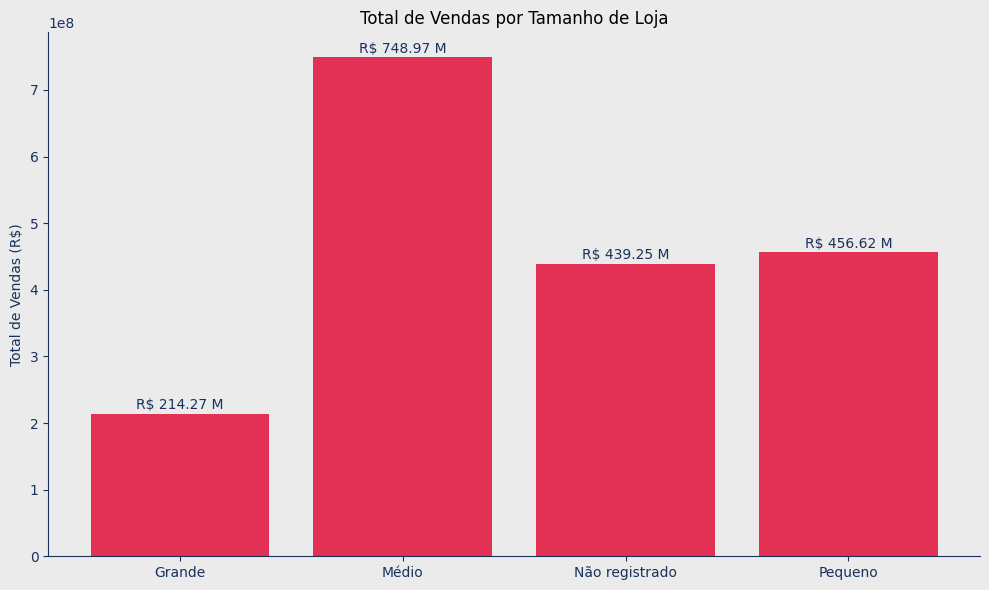

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por tamanho de loja
df_agrupado = df.groupby('loja_tamanho')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras
barras = ax.bar(df_agrupado['loja_tamanho'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Tamanho de Loja')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.xaxis.label.set_color(cor_texto)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "loja_tipo" com 4 categorias de tipo para lojas: 'Supermercado Tipo 1', 'Supermercado Tipo 2',  'Mercado', 'Supermercado Tipo 3'.

Desejo criar uma visualização que permita identificar o total obtido em vendas para as quatro categorias de tipo de loja e representá-las em um gráfico de barras.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "loja_tipo".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb" e as barras na cor "#e23155".

Além disso, é necessário exibir o total das vendas em milhões acima de cada coluna, com o texto dessa informação na cor "#19325c" e a estrutura "R$ valor M".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

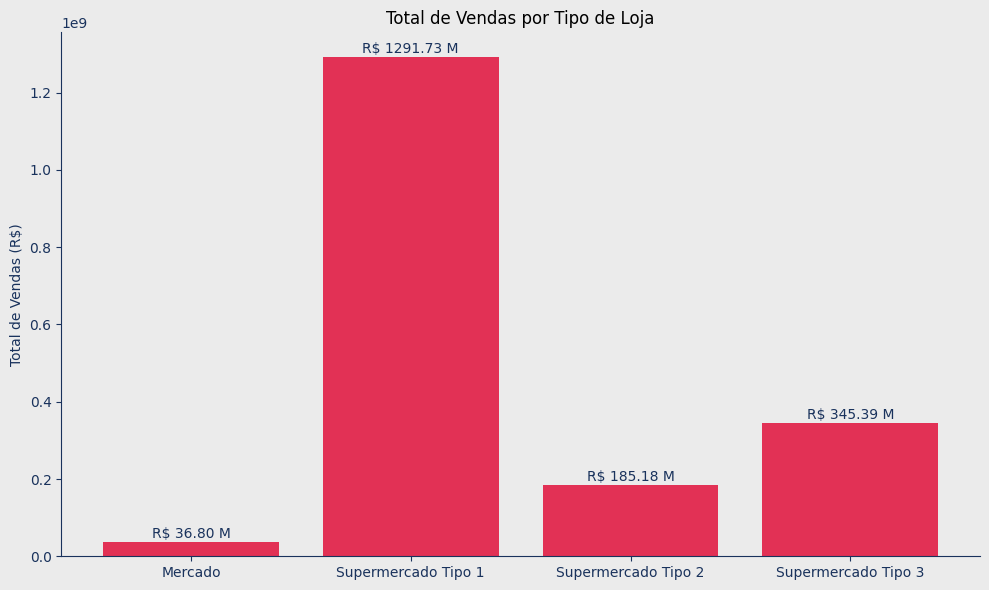

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por tipo de loja
df_agrupado = df.groupby('loja_tipo')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras
barras = ax.bar(df_agrupado['loja_tipo'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Tipo de Loja')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.xaxis.label.set_color(cor_texto)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "item_tipo" com 16 categorias de produtos.

Desejo criar uma visualização que permita identificar o total obtido em vendas por categorias de produtos em um gráfico de barras horizontais.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "item_tipo".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb".

As barras precisam estar na cor "#e23155".

Os valores das barras precisam estar ordenadas para manter um aspecto de funil.

Além disso, é necessário exibir o total das vendas em milhões dentro ou ao lado de cada barra, com o texto dessa informação na cor "#19325c" e na estrutura "R$ valor M".

Não mostre o grid no plot.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

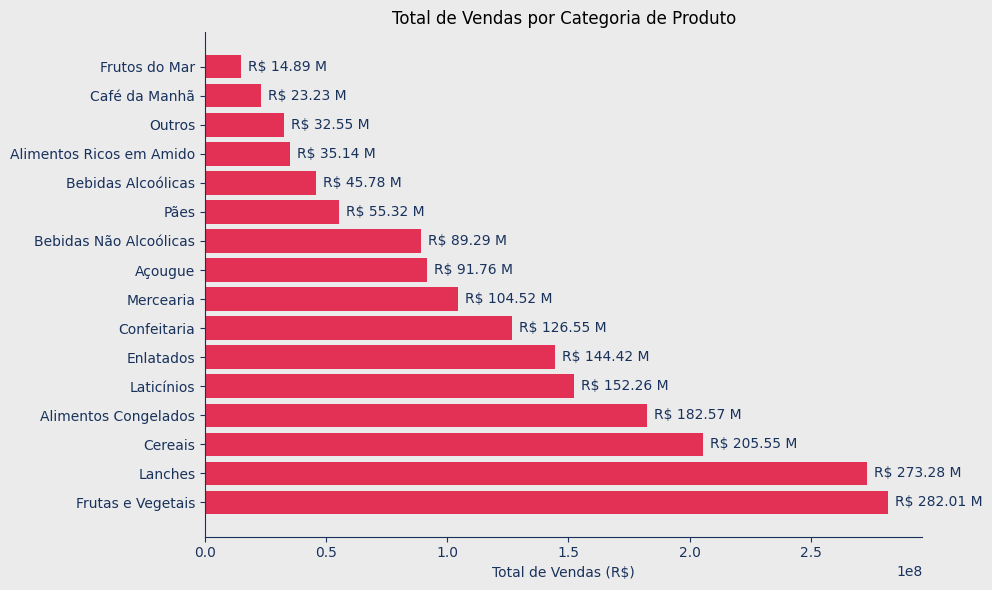

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por categoria de produto
df_agrupado = df.groupby('item_tipo')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Ordenar o DataFrame por vendas totais (funil)
df_agrupado = df_agrupado.sort_values(by='vendas_totais', ascending=True)

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras horizontais
barras = ax.barh(df_agrupado['item_tipo'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas dentro de cada barra
for bar in barras:
    largura_barra = bar.get_width()
    valor_vendas = largura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(largura_barra, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', va='center', color=cor_texto)

# Configurações adicionais
ax.set_xlabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Categoria de Produto')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Inverter a ordem das categorias de produtos para manter o aspecto de funil
ax.invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "item_conteudo_gordura" com 2 categorias: 'Baixo Teor de Gordura' e 'Regular'.

Desejo criar uma visualização que permita identificar o total obtido em vendas para as 2 categorias de quantidade de gordura em um gráfico de coluna.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "item_conteudo_gordura".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb".

As colunas de cada categoria devem ter cores específicas: a categoria 'Baixo Teor de Gordura' na cor "#e23155" e a categoria 'Regular' na cor "#acdcd3".

Além disso, é necessário exibir o total das vendas em milhões acima de cada coluna, com o texto dessa informação na cor "#19325c" e na estrutura "R$ valor M".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

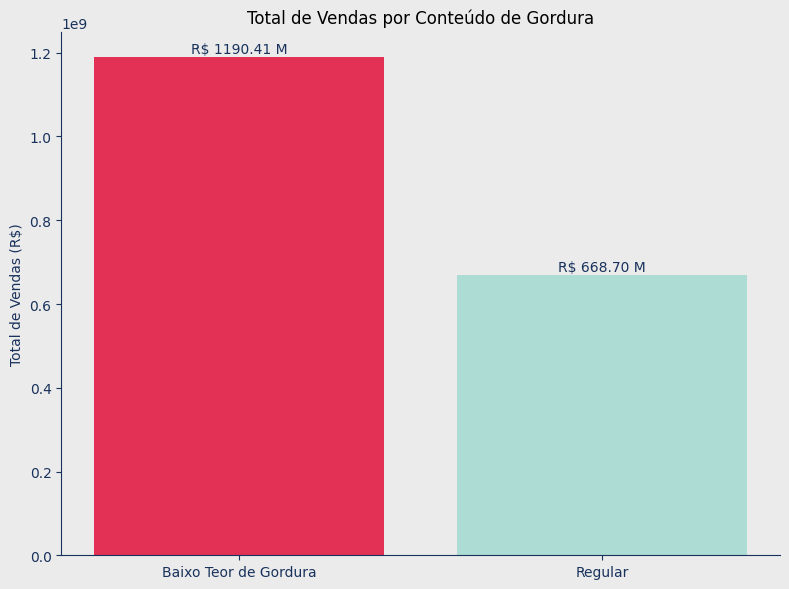

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por categoria de quantidade de gordura
df_agrupado = df.groupby('item_conteudo_gordura')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_baixo_gordura = "#e23155"
cor_regular = "#acdcd3"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as colunas
barras = ax.bar(df_agrupado['item_conteudo_gordura'], df_agrupado['vendas_totais'],
                color=[cor_baixo_gordura, cor_regular])

# Adicione o total de vendas acima de cada coluna
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Conteúdo de Gordura')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()
